Make a function similar to sim_parabola in the last exercise to generate test and training data from a sine curve $y = \sin(x)$ with added gaussian random noise with $\sigma=0.05$.  *TIP: try to do it before you look at the other notebook, but then look at it from time to time when you get stuck but DO NOT COPY PASTE!*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


#constants
xmin=-10
xmax=10
noise=0.05
N_train=100
N_test=100
#lists
x_train=[]
x_test=[]
y_train=[]
y_test=[]

def sinx (xmin,xmax,noise):
    x= np.random.random()* (xmax-xmin)+xmin
    y= np.sin(x) + np.random.normal(scale=noise)
    return x,y  


for i in range(N_train):
    x, y= sinx(xmin,xmax,noise)
    x_train.append(x)
    y_train.append(y)

for i in range (N_test):
    x,y=sinx(xmin,xmax,noise)
    x_test.append(x)
    y_test.append(y)
    
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

    

Make a scatter plot of your training data, your test data, and a legend so we can see which is which:

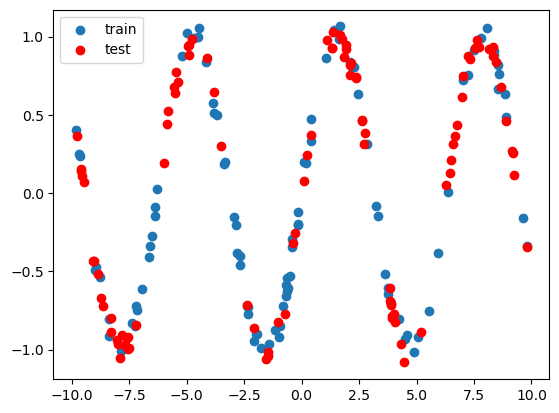

In [2]:
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_test, y_test,c='red', label='test')
plt.legend()
plt.show()

Make a sequential model to take input values x and return predictions y for sin(x).  Hint: look at the previous exercise!

In [3]:
dropout=0.3
Validationsplit=0.2
batchsize=25
Nepochs=200


#make the model
model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_dim=1,activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(1)
    ])
# specify loss function
loss_fn= tf.keras.losses.MeanSquaredError()
learning_rate=0.001

#compile my model 
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate), loss=loss_fn)
history=model.fit(x_train,y_train,validation_split=Validationsplit,batch_size=batchsize,epochs=Nepochs)


/Users/saqs/.aCODING/chem-env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 622ms/step - loss: 0.7433 - val_loss: 0.4238
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7124 - val_loss: 0.5174
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6923 - val_loss: 0.4979
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4584 - val_loss: 0.4243
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5572 - val_loss: 0.4474
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6486 - val_loss: 0.4497
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4753 - val_loss: 0.5041
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4968 - val_loss: 0.5404
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6100 - val_loss: 0.4756
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5360 - val_loss: 0.4024
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4858 - val_loss: 0.4021
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4496 - val_l

Use a mean squared error loss function and the Adam optimiser to train the model.  Store the history.

In [ ]:
# done it above

Plot the loss and the val_loss from the history

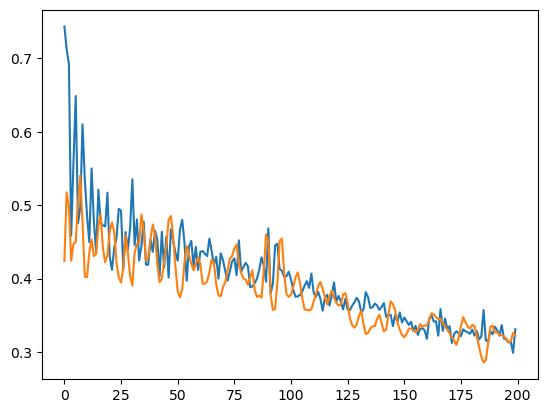

In [4]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Use the model to make predictions for the test data and plot these results on the same plot as the training examples

4/4 - 0s - 11ms/step - loss: 0.2992
loss=0.299
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


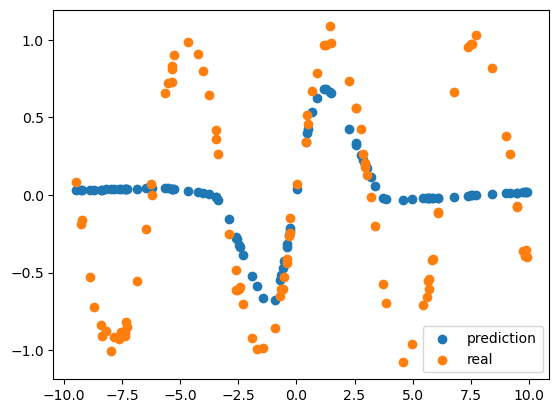

In [10]:
loss=model.evaluate(x_test,y_test,verbose=2)
print('loss={:5.3f}'.format(loss))

y_predict=model.predict(x_test)
plt.scatter(x_test,y_predict,label='prediction' )
plt.scatter(x_test,y_test,label='real')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


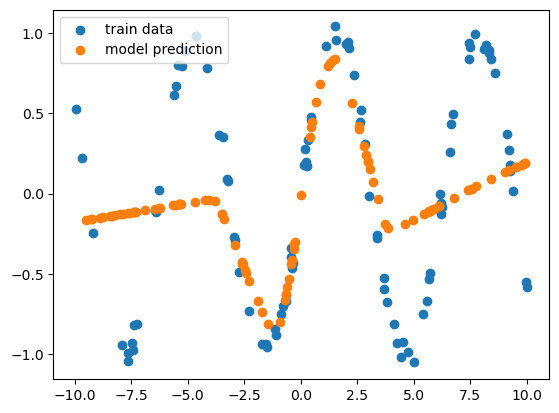

In [16]:
# 1. Predict on unseen test inputs
y_pred = model.predict(x_test)

# 2. Plot training data
plt.scatter(x_train, y_train, label='train data')

# 3. Plot model predictions on test data
plt.scatter(x_test, y_pred, label='model prediction')

plt.legend()
plt.show()

Plot the residuals between the test y values and the models predicted y values

underfitting. maybe because of the high dropout? or not enough epochs? I will test out both indivdually:

In [12]:
dropout=0.15 #halved the dropout
Validationsplit=0.2
batchsize=25
Nepochs=200


#make the model
model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_dim=1,activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(1)
    ])
# specify loss function
loss_fn= tf.keras.losses.MeanSquaredError()
learning_rate=0.001

#compile my model 
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate), loss=loss_fn)
history=model.fit(x_train,y_train,validation_split=Validationsplit,batch_size=batchsize,epochs=Nepochs)

Epoch 1/200


/Users/saqs/.aCODING/chem-env/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/Users/saqs/.aCODING/chem-env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.5703 - val_loss: 0.5278
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5028 - val_loss: 0.4462
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4606 - val_loss: 0.4196
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5766 - val_loss: 0.4375
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4947 - val_loss: 0.4753
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4656 - val_loss: 0.4682
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4909 - val_loss: 0.4222
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4944 - val_loss: 0.4362
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4685 - val_loss: 0.4620
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4457 - val_loss: 0.4050
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4812 - val_loss: 0.4130
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4804 - val_loss: 0.4736
E

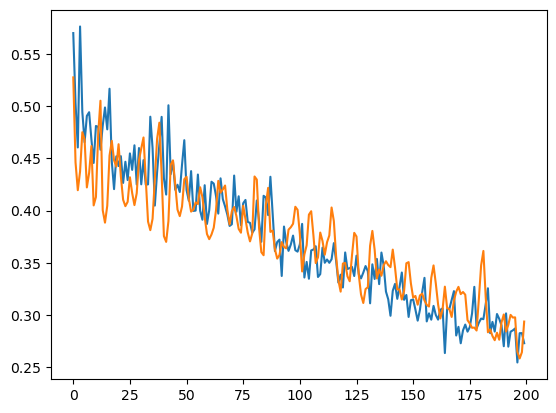

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


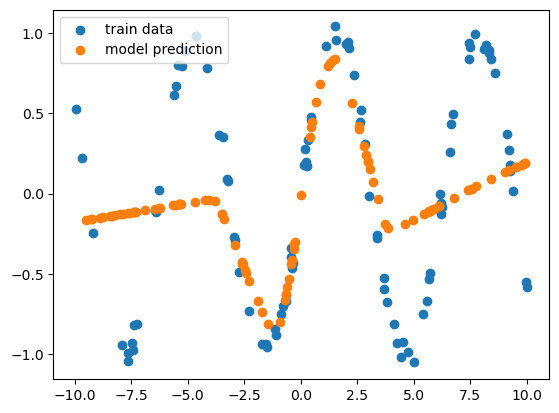

In [17]:
# 1. Predict on unseen test inputs
y_pred = model.predict(x_test)

# 2. Plot training data
plt.scatter(x_train, y_train, label='train data')

# 3. Plot model predictions on test data
plt.scatter(x_test, y_pred, label='model prediction')

plt.legend()
plt.show()

4/4 - 0s - 17ms/step - loss: 0.2547
loss=0.255
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


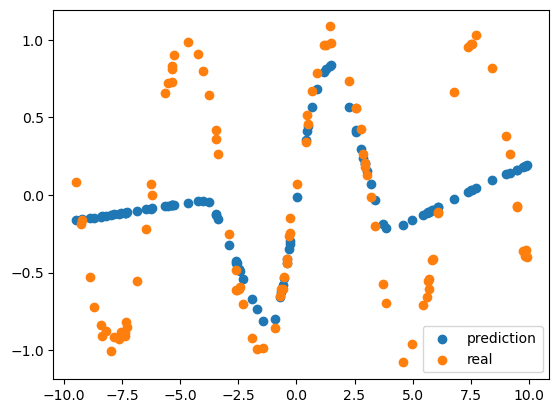

In [15]:
loss=model.evaluate(x_test,y_test,verbose=2)
print('loss={:5.3f}'.format(loss))

y_predict=model.predict(x_test)
plt.scatter(x_test,y_predict,label='prediction' )
plt.scatter(x_test,y_test,label='real')
plt.legend()
plt.show()

In [18]:
dropout=0.15 #halved the dropout
Validationsplit=0.2
batchsize=25
Nepochs=400 #doubled epochs, give the model more of a chance to learn


#make the model
model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_dim=1,activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(1)
    ])
# specify loss function
loss_fn= tf.keras.losses.MeanSquaredError()
learning_rate=0.001

#compile my model 
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate), loss=loss_fn)
history=model.fit(x_train,y_train,validation_split=Validationsplit,batch_size=batchsize,epochs=Nepochs)

Epoch 1/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.5670 - val_loss: 0.4261
Epoch 2/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4502 - val_loss: 0.5280
Epoch 3/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5790 - val_loss: 0.5006
Epoch 4/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4742 - val_loss: 0.4252
Epoch 5/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5564 - val_loss: 0.4374
Epoch 6/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5089 - val_loss: 0.4624
Epoch 7/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4680 - val_loss: 0.5478
Epoch 8/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5306 - val_loss: 0.4678
Epoch 9/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5133 - val_loss: 0.3962
Epoch 10/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4437 - val_loss: 0.4061
Epoch 11/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4901 - val_loss: 0.4508
Epoch 12/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4317 - val_lo

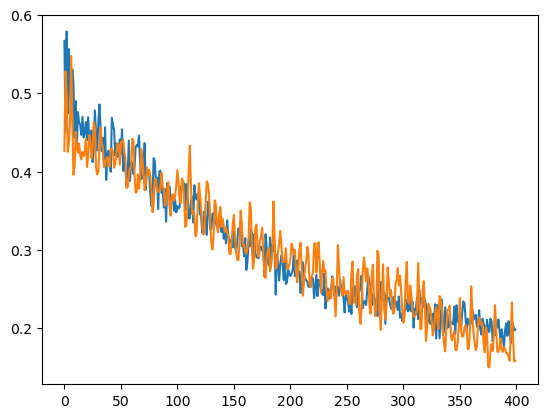

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

4/4 - 0s - 29ms/step - loss: 0.1978
loss=0.198
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


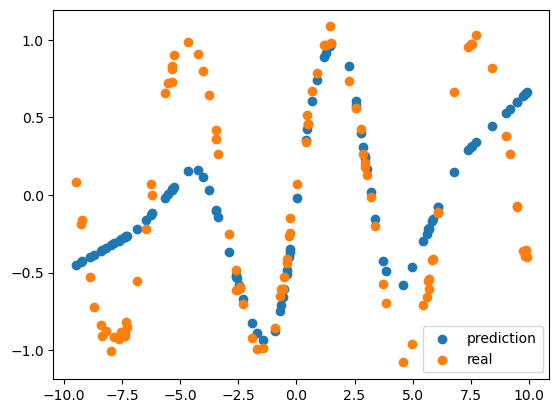

In [20]:
loss=model.evaluate(x_test,y_test,verbose=2)
print('loss={:5.3f}'.format(loss))

y_predict=model.predict(x_test)
plt.scatter(x_test,y_predict,label='prediction' )
plt.scatter(x_test,y_test,label='real')
plt.legend()
plt.show()

In [25]:
dropout=0.15 #halved the dropout
Validationsplit=0.2
batchsize=5
Nepochs=400 #doubled epochs, give the model more of a chance to learn


#make the model
model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_dim=1,activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(1)
    ])
# specify loss function
loss_fn= tf.keras.losses.MeanSquaredError()
learning_rate=0.001

#compile my model 
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate), loss=loss_fn)
history=model.fit(x_train,y_train,validation_split=Validationsplit,batch_size=batchsize,epochs=Nepochs)

Epoch 1/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.5841 - val_loss: 0.4470
Epoch 2/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6064 - val_loss: 0.5391
Epoch 3/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5513 - val_loss: 0.5316
Epoch 4/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5299 - val_loss: 0.4003
Epoch 5/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6504 - val_loss: 0.4164
Epoch 6/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4770 - val_loss: 0.4356
Epoch 7/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4500 - val_loss: 0.4149
Epoch 8/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4668 - val_loss: 0.4582
Epoch 9/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4947 - val_loss: 0.4196
Epoch 10/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5094 - val_loss: 0.3931
Epoch 11/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4736 - val_loss: 0.4621
Epoch 12/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 

4/4 - 0s - 35ms/step - loss: 0.0940
loss=0.094
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


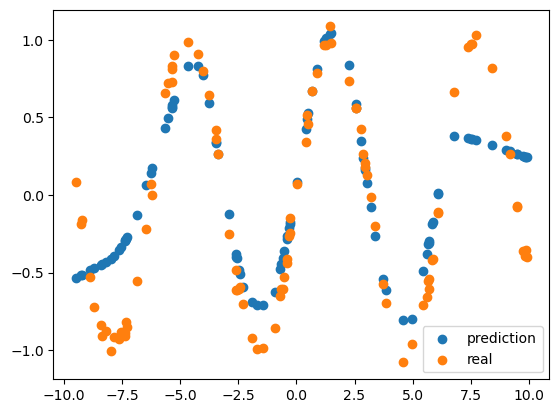

In [26]:
loss=model.evaluate(x_test,y_test,verbose=2)
print('loss={:5.3f}'.format(loss))

y_predict=model.predict(x_test)
plt.scatter(x_test,y_predict,label='prediction' )
plt.scatter(x_test,y_test,label='real')
plt.legend()
plt.show()

Does your model give a good fit to the data?  If not, try to fix it.  What things can you try?  Hint: look at the previous exercise.

Optional exercise: repeat this exercise with a cubic $y(x) = a + bx + cx^{2} + dx^{3}$ function plus the same gaussian noise.  Can you make a neural network architecture and set of hyperparameters (batch size, learning rate, number of epochs etc) such that the training always works no matter what values we chose for $a, b, c$ and $d$? 

In [27]:
train_loss = model.evaluate(x_train, y_train, verbose=0)
test_loss  = model.evaluate(x_test,  y_test,  verbose=0)
print("train_loss:", train_loss)
print("test_loss :", test_loss)

train_loss: 0.10364791005849838
test_loss : 0.09404043108224869


In [28]:
dropout=0.05 #halved the dropout
Validationsplit=0.2
batchsize=5
Nepochs=400 #doubled epochs, give the model more of a chance to learn


#make the model
model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_dim=1,activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(1)
    ])
# specify loss function
loss_fn= tf.keras.losses.MeanSquaredError()
learning_rate=0.001

#compile my model 
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate), loss=loss_fn)
history=model.fit(x_train,y_train,validation_split=Validationsplit,batch_size=batchsize,epochs=Nepochs)

Epoch 1/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.5004 - val_loss: 0.5123
Epoch 2/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5039 - val_loss: 0.4535
Epoch 3/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4619 - val_loss: 0.4250
Epoch 4/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4782 - val_loss: 0.4085
Epoch 5/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4353 - val_loss: 0.4985
Epoch 6/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4773 - val_loss: 0.4141
Epoch 7/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4500 - val_loss: 0.4996
Epoch 8/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5016 - val_loss: 0.4954
Epoch 9/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4769 - val_loss: 0.4317
Epoch 10/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4498 - val_loss: 0.4804
Epoch 11/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4299 - val_loss: 0.4259
Epoch 12/400
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

In [29]:
train_loss = model.evaluate(x_train, y_train, verbose=0)
test_loss  = model.evaluate(x_test,  y_test,  verbose=0)
print("train_loss:", train_loss)
print("test_loss :", test_loss)

train_loss: 0.029806144535541534
test_loss : 0.020314466208219528


4/4 - 0s - 10ms/step - loss: 0.0203
loss=0.020
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


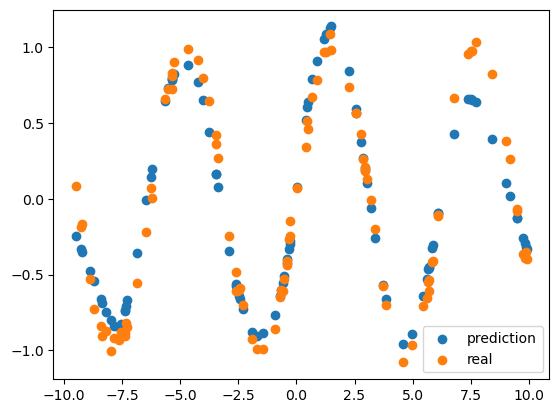

In [30]:
loss=model.evaluate(x_test,y_test,verbose=2)
print('loss={:5.3f}'.format(loss))

y_predict=model.predict(x_test)
plt.scatter(x_test,y_predict,label='prediction' )
plt.scatter(x_test,y_test,label='real')
plt.legend()
plt.show()